In this notebook we have a lok at the equation

$$\rho^*=\Phi\left(\sqrt{\gamma}(\rho^*-\bar r)\right)$$

which determines the equilibrium cutoff $\rho^*$. Recall that 

$$\gamma = \frac{1+\beta}{\beta(1+2\beta)}.$$

Parameters: 
- $\beta$ is the precision of the private signal (which is distributed normally with variance $1/\beta$ around r)
- $\bar r$ is the public signal  (which is distributed normally with variance $1$ around r)

In [2]:
##load some packages to be used below
using Distributions #package for probablity distributions
using Roots #package to solve univariate equations

##parameters
beta0 = 0.5
gamma0 = (1+beta0)/(beta0*(1+2beta0))
rBar0 = 1.0

##standard normal cumulative distribution function 
#(gives prob that θ is less than x if θ is standard normally distributed)
normalCDF(x) = cdf(Normal(),x)

##equation that defines ρ*
#right hand side of the equation
rhs(rho) = normalCDF(sqrt(gamma0)*(rho-rBar0))
#function such that has ρ* as its zero: rhStarEquation(ρ*)=0
rhoStarEquation(rho) = rho - rhs(rho)

##solving for ρ*
rhoStar = fzero(rhoStarEquation,0,1)
println("ρ* equals ",round(rhoStar,5))

ρ* equals 0.14851


In the following cell we get a graphical representation of the equation for a range of values of the parameters. The left hand side of the equation (i.e. $\rho$) and the right hand side (i.e. ) ar plotted. At the intersection there is $\rho^*$.

Note that we need the assumption that $\beta$ is sufficiently high to have a unique intersection (and therefore a unique rationalizable action). Below you can see that we get several intersections if $\beta$ is very low (and $\bar r\approx 0.5$). You also see that the right hand side is getting flatter as $\beta$ increases. In particular, it will have slope less than 1 everywhere if $\beta$ is below $\sim 0.17$. In this case, there can be only one intersection with the 45° line.

(Some fun question you might ask yourself: Why does $\rho^*$ not change in $\beta$ if $\bar r=0.5$ while it does for other values of $\bar r$?)

Interact.Options{:SelectionSlider,Any}(5: "input-3" = 0.3 Any , "beta", 0.3, "0.3", 5, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0.1"=>0.1,"0.15"=>0.15,"0.2"=>0.2,"0.25"=>0.25,"0.3"=>0.3,"0.35"=>0.35,"0.4"=>0.4,"0.45"=>0.45,"0.5"=>0.5), Dict{Any,Any}(Pair{Any,Any}(0.4, "0.4"),Pair{Any,Any}(0.3, "0.3"),Pair{Any,Any}(0.15, "0.15"),Pair{Any,Any}(0.5, "0.5"),Pair{Any,Any}(0.2, "0.2"),Pair{Any,Any}(0.1, "0.1"),Pair{Any,Any}(0.45, "0.45"),Pair{Any,Any}(0.25, "0.25"),Pair{Any,Any}(0.35, "0.35"))), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(7: "input-4" = 0.5 Any , "rBar", 0.5, "0.5", 6, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0.0"=>0.0,"0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9…), Dict{Any,Any}(Pair{Any,Any}(0.6, "0.6"),Pair{Any,Any}(0.3, "0.3"),Pair{Any,Any}(0.7, "0.7"),Pair{Any,Any}(0.0, "0.0"),Pair{Any,Any}(0.2, "0.2"),Pair{Any,Any}(0.9, "0.9"),Pair{Any,Any}(0.8, "0.8"),Pair{Any,Any}(0.5, "0.5"),Pair{Any,Any}(0.1, "0.1"),Pair{Any,Any}(0.4, "0.4")…)), Any[], Any[], true, "horizontal")


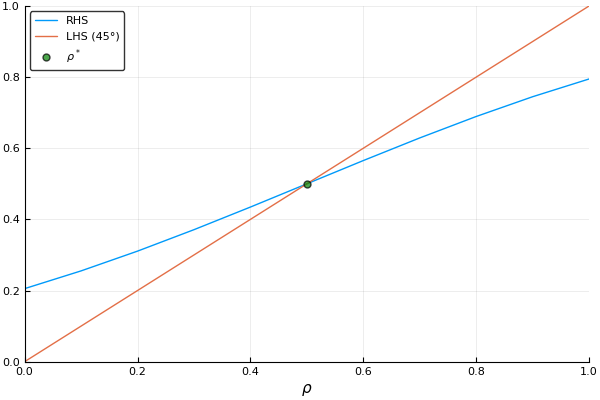

In [3]:
using Plots #package for making plots
using Interact #package for making plots interactive
using LaTeXStrings #package for LaTeX labels

#rhs as above but as a function of the parameters as well
function rhs(rho,beta,rBar)
    gamma = (1+beta)/(beta*(1+2beta))
    return normalCDF(sqrt(gamma)*(rho-rBar))
end

#use matplotlib as plotting backend
Plots.pyplot()

@manipulate for beta in 0.1:0.05:0.5, rBar in 0.0:0.1:1
    xgrid = 0.0:0.1:1.0
    ygrid1= rhs.(xgrid,beta,rBar)
    ygrid2 = collect(xgrid)
    plot([xgrid,xgrid],[ygrid1,ygrid2],xlim=(0,1),ylim=(0,1),label=["RHS" "LHS (45°)" L"\rho^*"]) #rho -> rhs(rho,beta,rBar)
    xlabel!(L"\rho")
    rhoStar = fzero(rho -> rho-rhs(rho,beta,rBar),0,1)
    scatter!([rhoStar],[rhoStar],marker=(5,0.7,:green),label=L"\rho^*")
end